In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline

plt.style.use("seaborn")

# I- Data Analysis
Before,Creating Our Model,we have to get some better Understadning About 
The Data That we are working with !, and for This Situation this is like The most Significant Part!

In [2]:
data_path = "main_dataset\HR_coma_sep_dataset.csv"
df = pd.read_csv(data_path)

df.sample(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
5266,0.80,0.99,3,158,3,0,0,0,sales,low
11030,0.73,0.61,4,260,2,1,0,0,sales,low
2365,0.37,0.63,4,153,3,1,0,0,sales,medium
1324,0.76,0.82,4,254,5,1,1,0,sales,medium
2175,0.13,0.59,5,160,5,0,0,0,technical,medium
9937,0.91,0.98,5,135,3,0,0,0,sales,low
7872,0.13,0.52,6,188,3,0,0,0,sales,medium
14918,0.09,0.89,6,282,4,0,1,0,support,low
2996,0.88,0.68,4,274,4,0,0,0,sales,medium
8284,0.64,0.94,3,150,2,0,0,0,technical,medium


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [4]:
len(df.columns)

10

In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [7]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df["left"].sample(3)

1502    1
6328    0
7433    0
Name: left, dtype: int64

In [10]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
df["left"].unique()

array([1, 0], dtype=int64)

In [12]:
df["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [13]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

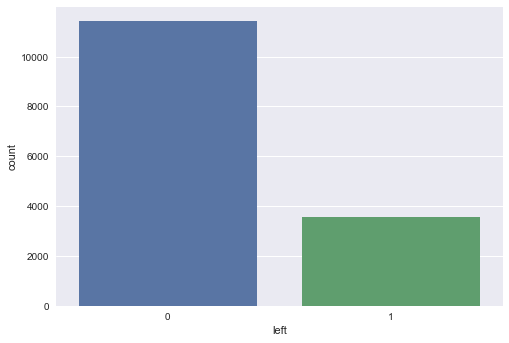

In [14]:
sns.countplot(x = df["left"], data = df)

In [15]:
df.groupby("salary").left.mean() * 100 

salary
high       6.628941
low       29.688354
medium    20.431275
Name: left, dtype: float64

In [16]:
df.groupby("Departments").left.mean() * 100

Departments
IT             22.249389
RandD          15.374841
accounting     26.597132
hr             29.093369
management     14.444444
marketing      23.659674
product_mng    21.951220
sales          24.492754
support        24.899058
technical      25.625000
Name: left, dtype: float64

In [17]:
print(df[df.salary == "low"].left.mean() * 100,"%",",Still Working!")
print(df[df.salary == "medium"].left.mean() * 100,"%",",Still Working!")
print(df[df.salary == "high"].left.mean() * 100,"%", ",Still Working!")

29.68835429196282 % ,Still Working!
20.431275209432208 % ,Still Working!
6.628940986257073 % ,Still Working!


In [18]:
df.groupby("Departments").Work_accident.mean() * 100

Departments
IT             13.365933
RandD          17.026684
accounting     12.516297
hr             12.043302
management     16.349206
marketing      16.083916
product_mng    14.634146
sales          14.178744
support        15.477793
technical      14.007353
Name: Work_accident, dtype: float64

In [19]:
df["number_project"].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

<AxesSubplot:xlabel='number_project', ylabel='count'>

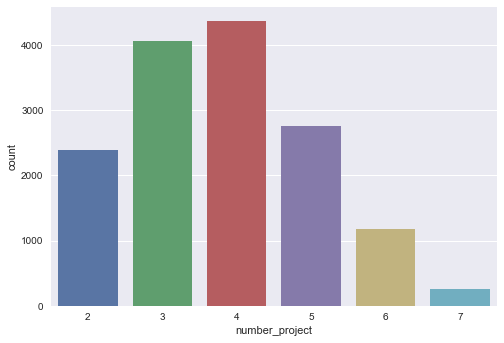

In [20]:
sns.countplot(x = df["number_project"], data = df)

In [21]:
print(df[df["number_project"] == 7].left.mean() * 100)
print(df[df["number_project"] == 6].left.mean() * 100)
print(df[df["number_project"] == 4].left.mean() * 100)
print(df[df["number_project"] == 3].left.mean() * 100)
print(df[df["number_project"] == 2].left.mean() * 100)

100.0
55.792163543441234
9.369988545246278
1.775585696670777
65.61976549413735


<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

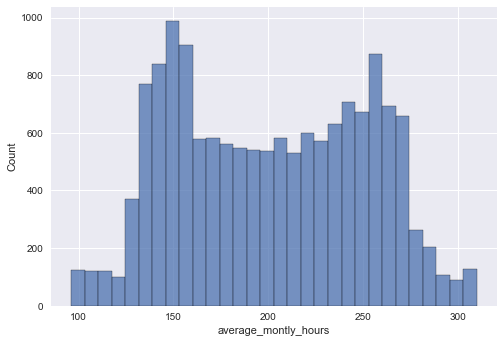

In [22]:
sns.histplot(x = df["average_montly_hours"],data = df,bins = 30)

In [23]:
print(8 * 30)
print(300 / 30)
print(200 / 30)
print(250 / 30)

240
10.0
6.666666666666667
8.333333333333334


In [24]:
df["average_montly_hours"].value_counts()

135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: average_montly_hours, Length: 215, dtype: int64

<AxesSubplot:ylabel='Frequency'>

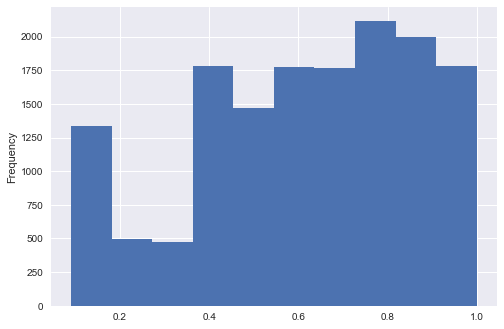

In [25]:
df["satisfaction_level"].plot(kind="hist")

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

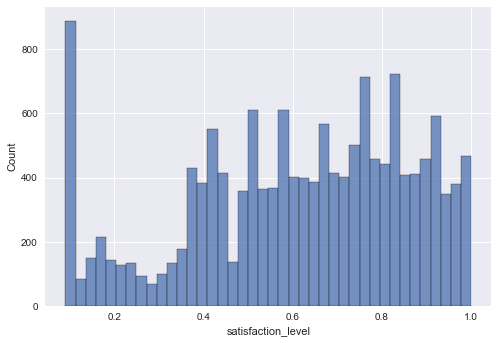

In [26]:
sns.histplot(x = df["satisfaction_level"], data = df, bins = 40)

In [27]:
df.groupby("time_spend_company").left.mean() * 100

time_spend_company
2      1.633785
3     24.615862
4     34.806414
5     56.551256
6     29.108635
7      0.000000
8      0.000000
10     0.000000
Name: left, dtype: float64

In [28]:
df[df["time_spend_company"] >= 4].left.mean() * 100

36.37048192771085

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

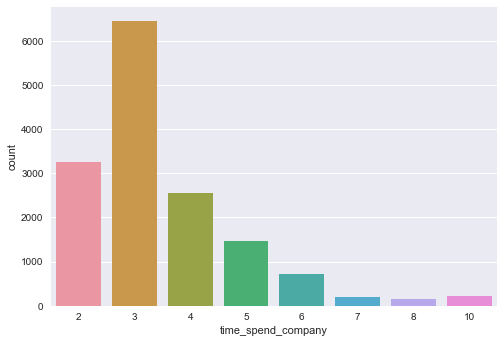

In [29]:
sns.countplot(x = "time_spend_company",data = df)

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

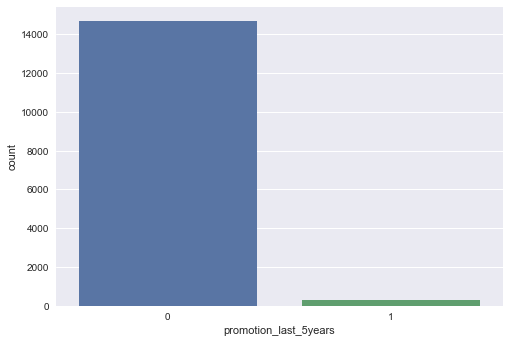

In [30]:
sns.countplot(x = "promotion_last_5years", data = df)

In [31]:
df.groupby("promotion_last_5years").left.mean() * 100

promotion_last_5years
0    24.196185
1     5.956113
Name: left, dtype: float64

In [32]:
df["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

# II- encoding
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column’s value can be represented as low:0, medium:1, and high:2. This process is known as label encoding. In sklearn, we can do this using LabelEncoder.

In [33]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [34]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments               object
salary                    object
dtype: object

In [35]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

# Converting string labels into numbers.
df['salary'] = LE.fit_transform(df['salary'])
df['Departments'] = LE.fit_transform(df['Departments'])

# Spliting Our Data into The Training and Testing Sets!

In [36]:
XS = df.drop("left", axis = 1)
y = df["left"]

XS.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
4545,0.82,0.89,4,196,3,0,1,9,2
1939,0.10,0.79,7,310,4,0,0,3,2
14075,0.77,0.55,3,217,3,0,0,8,2
1281,0.75,0.88,5,270,5,0,0,0,0
8432,0.64,0.50,3,146,3,0,0,9,1
7509,0.39,0.58,3,152,3,1,0,2,1
1878,0.40,0.49,2,144,3,0,0,8,1
1807,0.11,0.94,7,280,5,0,0,8,1
4799,0.37,0.74,2,197,3,0,0,6,1
13125,0.93,0.64,4,253,3,0,0,1,1


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(XS,y, test_size = 0.32,random_state = 1)

# PreProcessing

In [38]:
from sklearn.preprocessing import StandardScaler

S_SC = StandardScaler()
x_train = S_SC.fit_transform(x_train)
x_test = S_SC.transform(x_test)

# Modelling

In [39]:
def Models(x_train,y_train,show_training_acc = False) : 
    #logisticRegression
    from sklearn.linear_model import LogisticRegression
    LOGST_R = LogisticRegression(max_iter = 100,random_state = 40)
    LOGST_R.fit(x_train,y_train)
    #support vector Machines
    from sklearn.svm import SVC
    svm_C = SVC(kernel = "rbf").fit(x_train,y_train)
    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    KNN_C = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
    KNN_C.fit(x_train,y_train)
    
    if show_training_acc : 
         print("Logstic Regression Training AcCuracy : {}".format(LOGST_R.score(x_train, y_train) * 100))
         print("KNN Training Accurayc  : {}".format(KNN_C.score(x_train, y_train) * 100))
         print("SVM Classifier Training Accuracy : {}".format(svm_C.score(x_train, y_train) * 100))
    else : 
         print("")
   
    return LOGST_R,svm_C,KNN_C

In [40]:
model = Models(x_train,y_train,show_training_acc = True)
model

Logstic Regression Training AcCuracy : 76.77223257182077
KNN Training Accurayc  : 95.99960780468673
SVM Classifier Training Accuracy : 96.39180311795275


(LogisticRegression(random_state=40),
 SVC(),
 KNeighborsClassifier(n_neighbors=9))

# Model Evaluation

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Accuracy_calculation = lambda TN,TP,FN,FP : (TP + TN) / (TP + TN + FN + FP) * 100

for i in range(len(model)) : 
    cm = confusion_matrix(y_true = y_test, y_pred = model[i].predict(x_test))
    print();print(cm) ; print()
    
    
    print("Model[{}], Testing Accuracy : {}".format(i,Accuracy_calculation(cm[0][0],cm[1][1],cm[1][0],cm[0][1]) ))
    print()
    


[[3340  304]
 [ 835  321]]

Model[0], Testing Accuracy : 76.27083333333333


[[3564   80]
 [ 115 1041]]

Model[1], Testing Accuracy : 95.9375


[[3533  111]
 [ 107 1049]]

Model[2], Testing Accuracy : 95.45833333333333



In [42]:
def model_Evaluation(y_test,x_test,  model) : 
    
     for i in range(len(model))  :
    
        print(F"Model {i} accuracy : {accuracy_score(y_test, model[i].predict(x_test))}") ; print()
        print("classification report for Model   {}: {}".format(i, classification_report(y_test, model[i].predict(x_test), zero_division = 1)))

    
print(model_Evaluation(y_test, x_test, model))

Model 0 accuracy : 0.7627083333333333

classification report for Model   0:               precision    recall  f1-score   support

           0       0.80      0.92      0.85      3644
           1       0.51      0.28      0.36      1156

    accuracy                           0.76      4800
   macro avg       0.66      0.60      0.61      4800
weighted avg       0.73      0.76      0.74      4800

Model 1 accuracy : 0.959375

classification report for Model   1:               precision    recall  f1-score   support

           0       0.97      0.98      0.97      3644
           1       0.93      0.90      0.91      1156

    accuracy                           0.96      4800
   macro avg       0.95      0.94      0.94      4800
weighted avg       0.96      0.96      0.96      4800

Model 2 accuracy : 0.9545833333333333

classification report for Model   2:               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3644
           1       

 it seems like The LogisticRegreesion classifier , is not really good for Solving This Problem
cuz , it works well only with a small collection of data!.
but The svm's accuracy is reallly impreesive, its 95%, cuz the svm classifier works,with a large number of data
wich is something Pretty Cool,!
The same Thing For The KNN model, KNN's Accuracy is almost 95%, as well, as the svm model!

Okey,so i'll choose THE KNN modle, as a final model!

In [43]:
our_final_model = model[-1]
print(accuracy_score(y_test,our_final_model.predict(x_test)) * 100)

95.45833333333333


# comparing Our model With a Dump Model !

In [44]:
from sklearn.dummy import DummyClassifier
model_acc = accuracy_score(y_test,our_final_model.predict(x_test))

dump_model = DummyClassifier(strategy = 'most_frequent').fit(x_train,y_train)
print("Dump model , Accuracy : {}".format(accuracy_score(y_test,dump_model.predict(x_test)) * 100))
print("Our Main Model Accuracy : {}".format(model_acc * 100))

Dump model , Accuracy : 75.91666666666667
Our Main Model Accuracy : 95.45833333333333


# Finaly Lets save Our Model !

In [45]:
import pickle
s = pickle.dumps(our_final_model)
clf2 = pickle.loads(s)

all_predictions = clf2.predict(x_test)
all_final_predictions = []

for i in range(len(all_predictions)) : 
    all_final_predictions.append(all_predictions[i])
    
print(all_final_predictions)

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 

# Okey, thats It ! :) 